In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

import seaborn as sns
import datetime
import h5py

import numpy as np
import pandas as pd
from sklearn import pipeline

# load dataset
which is available in the release on the repo.

In [2]:
datafolder = '../dataset/'

In [3]:
df = pd.read_csv(datafolder+'dataset.pd', index_col=0)

In [4]:
df.head()

,finger,surface,class,filename
0,index,S3,touch,antoine_2017-03-08_10:48:36.hdf5
1,index,S3,notouch,antoine_2017-03-08_10:50:27.hdf5
2,thumb,S3,touch,antoine_2017-03-08_10:52:53.hdf5
3,thumb,S3,notouch,antoine_2017-03-08_10:54:12.hdf5
4,pinky,S3,touch,antoine_2017-03-08_10:55:51.hdf5


# Extract the features

In [5]:
import ml

In [6]:
pip = pipeline.Pipeline([
    ('step1', ml.Step1()),
    ('voxelgridfilter', ml.VoxelGridFilter(leaf_size=0.002)),
    ('roiextractor', ml.RoiExtractor()),
    ('fingerPlaneExtractor', ml.FingerPlaneExtractor()),
    ('featureextractor', ml.FeatureExtractor()),
])

class Dataset(object):
    def __init__(self, X, org, mat, ext):
        self.X = X
        self.org = org
        self.mat = mat
        self.ext = ext

In [7]:
def extract_feature(args):
    i, row = args

    ## X
    filename = row['filename']    
    hdf5file = h5py.File(datafolder+filename, 'r')

    x = hdf5file['data/depth']
    org = np.array(hdf5file['origin'], dtype=np.float32)
    mat = np.array(hdf5file['matrix'], dtype=np.float32)
    ext = np.array(hdf5file['extrema'], dtype=np.float32)

    t1 = datetime.datetime.now()
    data = pip.transform([Dataset(x, org, mat, ext)])

    print("classification {} for {} frames".format(datetime.datetime.now() - t1, x.shape[0]))
    return data[:,:-3]

In [8]:
from multiprocessing import Pool

pool = Pool(processes=8)
Xc = pool.map(extract_feature, df.iterrows())

/Users/antoine/anaconda/envs/fistwriter_reprod/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/fistwriter_reprod/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/fistwriter_reprod/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/fistwriter_reprod/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/fistwriter_reprod/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


classification 0:01:16.484027 for 900 frames
classification 0:01:17.890719 for 900 frames
classification 0:01:18.083298 for 900 frames
classification 0:01:20.188588 for 900 frames
classification 0:01:20.628217 for 900 frames
classification 0:01:23.737078 for 900 frames
classification 0:01:24.315801 for 900 frames
classification 0:01:24.860545 for 900 frames
classification 0:00:55.279511 for 900 frames
classification 0:00:59.786711 for 900 frames
classification 0:00:58.010044 for 900 frames
classification 0:01:01.788750 for 900 frames


In [9]:
df

,finger,surface,class,filename
0,index,S3,touch,antoine_2017-03-08_10:48:36.hdf5
1,index,S3,notouch,antoine_2017-03-08_10:50:27.hdf5
2,thumb,S3,touch,antoine_2017-03-08_10:52:53.hdf5
3,thumb,S3,notouch,antoine_2017-03-08_10:54:12.hdf5
4,pinky,S3,touch,antoine_2017-03-08_10:55:51.hdf5
5,pinky,S3,notouch,antoine_2017-03-08_10:56:57.hdf5
6,index,S4,touch,antoine_2017-03-08_11:01:13.hdf5
7,index,S4,notouch,antoine_2017-03-08_11:02:24.hdf5
8,thumb,S4,touch,antoine_2017-03-08_11:03:39.hdf5
9,thumb,S4,notouch,antoine_2017-03-08_11:04:52.hdf5


# compare with features.npy

In [10]:
Xc = np.array(Xc)

In [11]:
Xc.shape

(12, 900, 20)

In [12]:
Xc_ = np.load('./features.npy')

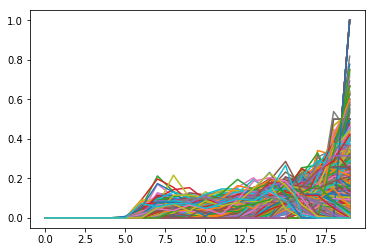

In [13]:
_=plt.plot(Xc[1].T)

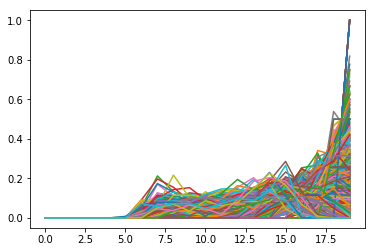

In [14]:
_=plt.plot(Xc_[1].T)

In [15]:
np.count_nonzero(np.isclose(Xc, Xc_)) / np.prod(Xc.shape)

0.9987314814814815